**Final Notebook**

**Importing the files**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


**EDA for DataSet**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_df=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [5]:
# Display summary statistics
print(df.describe())


            VendorID  passenger_count  trip_distance     RatecodeID  \
count  175000.000000    168923.000000  175000.000000  168923.000000   
mean        0.728377         1.357678       5.145930       1.518307   
std         0.445606         0.891283     394.971052       6.514678   
min         0.000000         0.000000       0.000000       1.000000   
25%         0.000000         1.000000       1.080000       1.000000   
50%         1.000000         1.000000       1.840000       1.000000   
75%         1.000000         1.000000       3.610000       1.000000   
max         2.000000         9.000000  135182.060000      99.000000   

        PULocationID   DOLocationID          extra     tip_amount  \
count  175000.000000  175000.000000  175000.000000  175000.000000   
mean      132.710349     132.701429       1.932143       6.127497   
std        76.148799      76.192493       1.948497       4.610834   
min         1.000000       1.000000      -7.500000       0.000079   
25%        67.0

In [6]:
# Check for missing values
print(df.isnull().sum())

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64


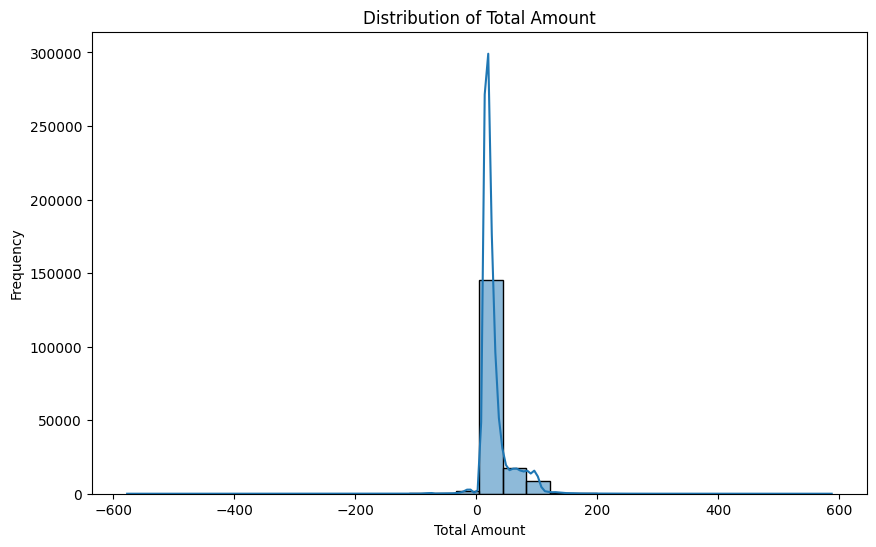

In [7]:
# Visualize the distribution of the target variable (total_amount)
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder
# Transform categorical columns using Label Encoding
label_encoder = LabelEncoder()
df['payment_type'] = label_encoder.fit_transform(df['payment_type'])
test_df['payment_type'] = label_encoder.fit_transform(test_df['payment_type'])


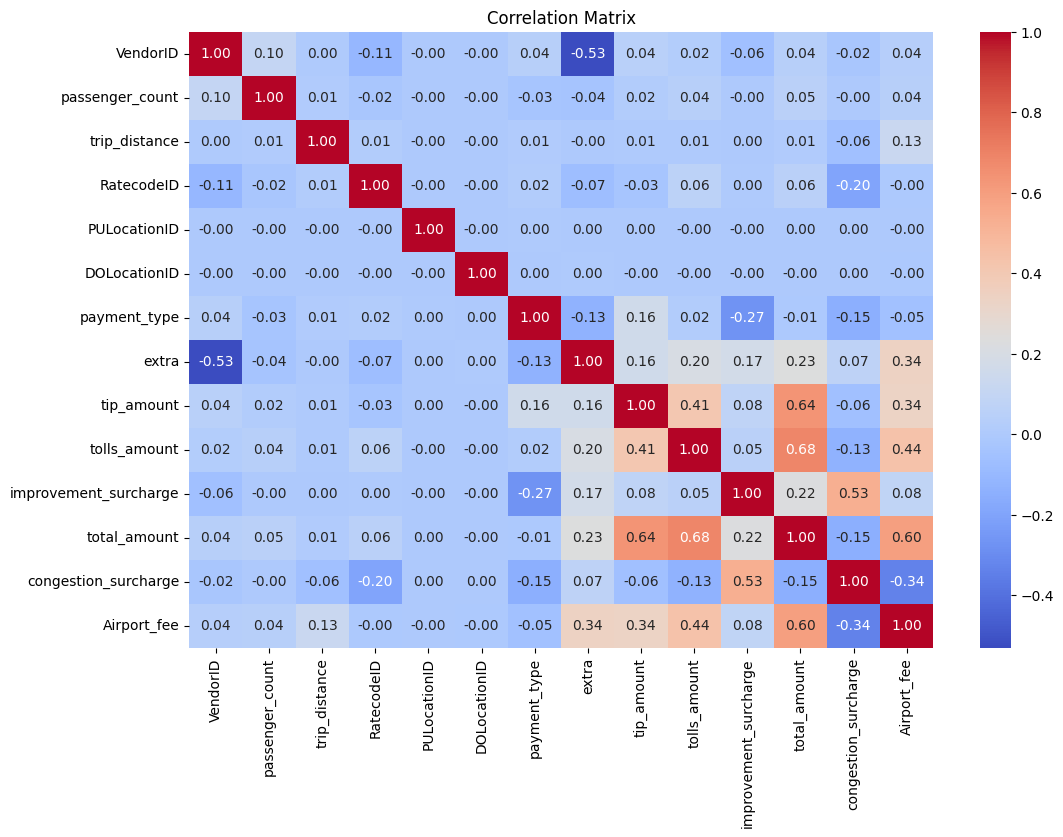

In [9]:
# Selecting the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Total_amount and passenger count has high relation
trip_distance and improvement_subcharge has no realtion
ratecodeID & total amount and ratecodeID &tolls_amount has high relation
payment_type and tip_amount has high relation
extra has relation with tip_amount, tolls_amount,improvement_subcharge and total_amount
tip_amount and tolls_amount &total_amount has high relation
tolls_amount and tip_amount & total_amount has high relation

Therefore total_amount has realtion with passenger_count,ratecodeID,tip_amount and tolls_amount.

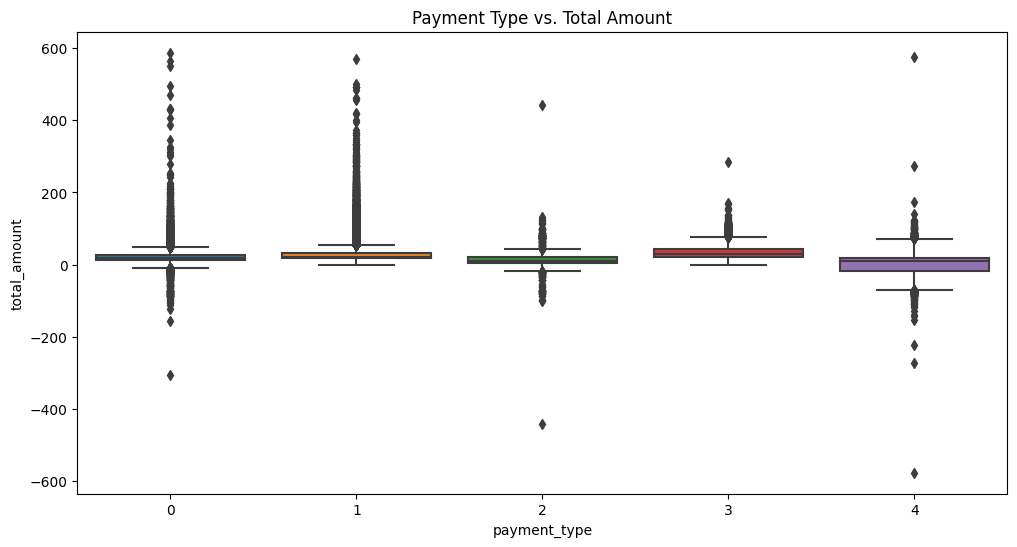

In [10]:
# Explore the relationship between categorical features and the target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_type', y='total_amount', data=df)
plt.title('Payment Type vs. Total Amount')
plt.show()


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


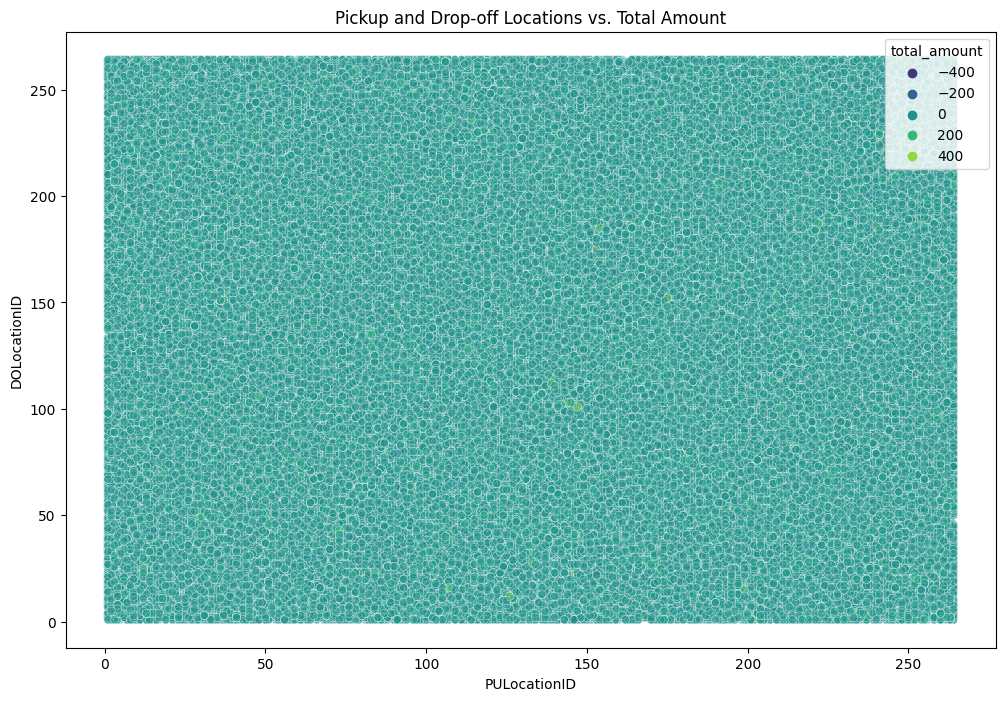

In [11]:
# Visualize the pickup and drop-off locations
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PULocationID', y='DOLocationID', hue='total_amount', data=df, palette='viridis', alpha=0.5)
plt.title('Pickup and Drop-off Locations vs. Total Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


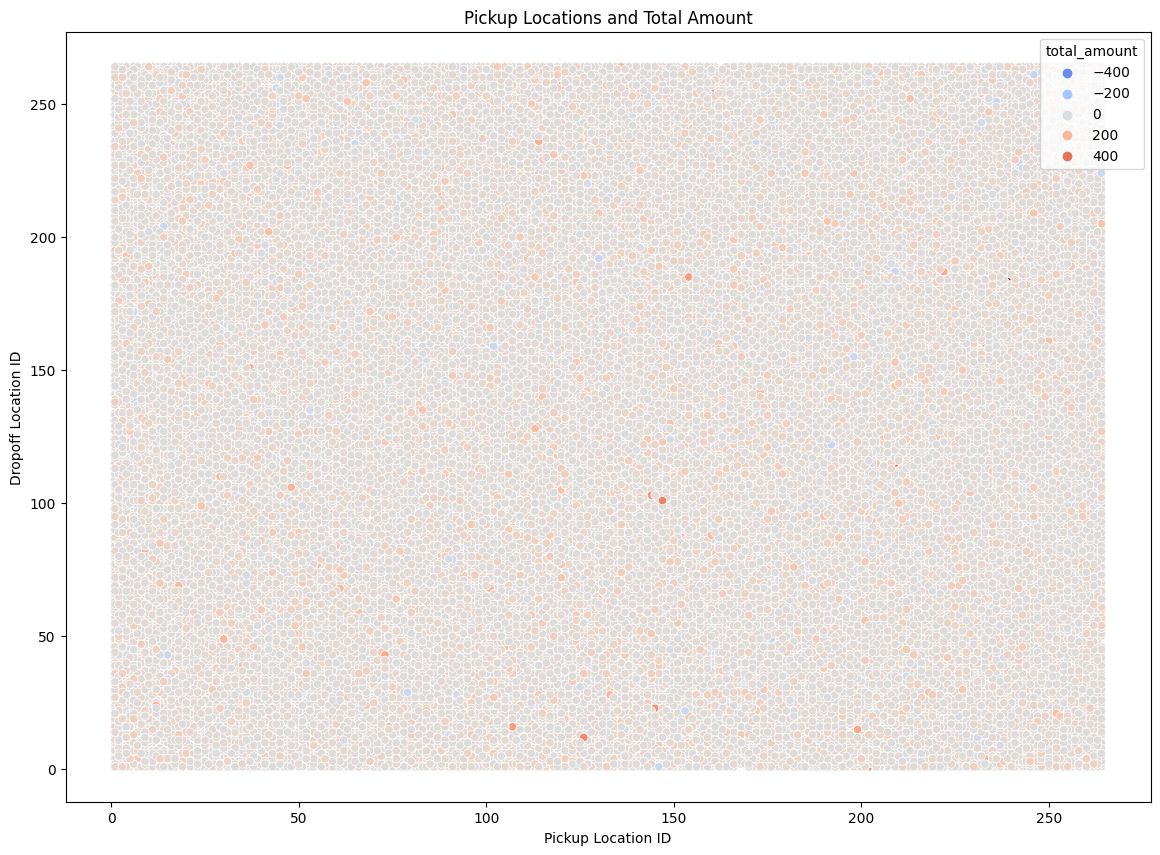

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the pickup and dropoff locations
plt.figure(figsize=(14, 10))
sns.scatterplot(x='PULocationID', y='DOLocationID', hue='total_amount', palette='coolwarm', data=df)
plt.title('Pickup Locations and Total Amount')
plt.xlabel('Pickup Location ID')
plt.ylabel('Dropoff Location ID')
plt.show()


In [13]:
# Print the column names in the dataset
print(df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')


Feature Engineering

In [14]:
print(df['tpep_pickup_datetime'].isnull().sum())

0


In [15]:
import pandas as pd

# Assuming df is your DataFrame
# Convert datetime columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract datetime features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['dropoff_dayofweek'] = df['tpep_dropoff_datetime'].dt.dayofweek
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60.0


In [16]:
# Imputing the missing values with the mean and mode
df['passenger_count'].fillna(df['passenger_count'].mean(), inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mean(), inplace=True)
df['Airport_fee'].fillna(df['Airport_fee'].mean(), inplace=True)

**KNN Model**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Remove unwanted columns
columns_to_drop = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee']
df = df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

# Transform categorical columns using Label Encoding
label_encoder = LabelEncoder()
df['payment_type'] = label_encoder.fit_transform(df['payment_type'])
test_df['payment_type'] = label_encoder.fit_transform(test_df['payment_type'])

# Set total_amount as the target variable (y) and the rest as features (X)
X = df.drop(columns=['total_amount'])
y = df['total_amount']
x_test = test_df

imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
X = imputer.fit_transform(X)
x_test = imputer.transform(x_test)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = KNeighborsRegressor(n_neighbors=2)
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(len(y_pred))

y_pred2 = model.predict(x_test)
print(len(y_pred2))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

submission_df = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_knn.csv', index=False)

52500
50000
Mean Squared Error: 127.34345543333333
R^2 Score: 0.8027519188843785


Result Insights
R^2 score of 0.80 means that approximately 80% of the variance in the dependent variable is explained by the model, suggesting a relatively good fit to the data.

**Random Forest Regressor**

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the R^2 score
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest R^2 Score: {r2_rf}')

# Make predictions on the submission set
y_pred_submission_rf = rf_model.predict(x_test)
submission_df_rf = pd.DataFrame({'ID': range(1, len(y_pred_submission_rf) + 1), 'total_amount': y_pred_submission_rf})

# Save the DataFrame to a CSV file
submission_df_rf.to_csv('submission.csv', index=False)



Random Forest R^2 Score: 0.948918094427424


Results
This is a strong fit to the data and the Random Forest model is performing well in capturing the underlying patterns and making accurate predictions in the regression task.

Comparing the knn and random forest regressor, random forest performs well on the data making accurate predictions of the traget variable which is the total amount.

**Decision Tree Model**

In [19]:

from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(len(y_pred))

y_pred2 = model.predict(x_test)
print(len(y_pred2))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Save predictions to a CSV file
submission_df = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})
submission_df.to_csv('submission.csv', index=False)


52500
50000
Mean Squared Error: 61.80448246095239
R^2 Score: 0.904268220708452


Results
The R^2 score of 0.904 suggests a strong fit, explaining approximately 90.4% of the variance in the dependent variable, showcasing effective predictive performance in the regression task.

Comparing knn, random forest regressor and decision tree, random forest regressor has a r^2 score of 0.94 proving to be more effective in the prediction of total_amount(target variable).

**Bagging Algorithm**

In [20]:

from sklearn.ensemble import BaggingRegressor

# Initialize the BaggingRegressor model with DecisionTreeRegressor as the base model
base_model = DecisionTreeRegressor(random_state=42)
model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(len(y_pred))

y_pred2 = model.predict(x_test)
print(len(y_pred2))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Save predictions to a CSV file
submission_df = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})
submission_df.to_csv('submission.csv', index=False)


52500
50000
Mean Squared Error: 33.031907333947615
R^2 Score: 0.9488353734784496


Bagging algorithm on decision tree regressor to improve the performance of the model.Now comparing both random forest and decison tree with bagging performs well

**Boosting Algorithm**

In [21]:
from sklearn.ensemble import GradientBoostingRegressor


# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(len(y_pred))

y_pred2 = model.predict(x_test)
print(len(y_pred2))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Save predictions to a CSV file
submission_df = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})
submission_df.to_csv('submission.csv', index=False)



52500
50000
Mean Squared Error: 71.72532721321025
R^2 Score: 0.8889013721823941


Hyperparameter tuning by doubling the learning rate,n_estimators and max depth

In [22]:
from sklearn.ensemble import GradientBoostingRegressor


# Initialize the GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(len(y_pred))

y_pred2 = model.predict(x_test)
print(len(y_pred2))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Save predictions to a CSV file
submission_df = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})
submission_df.to_csv('submission.csv', index=False)


52500
50000
Mean Squared Error: 31.336769945965113
R^2 Score: 0.9514610490254898


By comparing with other models the best model for prediction is gradient boosting algorithm after hyperparameter tuning.

**Multi Layer perceptron**

In [23]:

from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler



# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
x_test = scaler.transform(x_test)

# Initialize the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(len(y_pred))

y_pred2 = model.predict(x_test)
print(len(y_pred2))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Save predictions to a CSV file
submission_df = pd.DataFrame({'ID': range(1, len(y_pred2) + 1), 'total_amount': y_pred2})
submission_df.to_csv('submission.csv', index=False)


52500
50000
Mean Squared Error: 43.90203729400048
R^2 Score: 0.9319981338354565


**Linear Regression**

In [24]:

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline



# Initialize the Linear Regression model with Polynomial Features
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear_poly = model.predict(X_test)
print(len(y_pred_linear_poly))

y_pred2_linear_poly = model.predict(x_test)
print(len(y_pred2_linear_poly))

# Calculate the Mean Squared Error (MSE) as the evaluation metric
mse_linear_poly = mean_squared_error(y_test, y_pred_linear_poly)
print(f'Linear Regression with Polynomial Features Mean Squared Error: {mse_linear_poly}')

# Calculate the R-squared score
r2_linear_poly = r2_score(y_test, y_pred_linear_poly)
print(f'Linear Regression with Polynomial Features R^2 Score: {r2_linear_poly}')




52500
50000
Linear Regression with Polynomial Features Mean Squared Error: 87.82438342557997
Linear Regression with Polynomial Features R^2 Score: 0.8639648103869204


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()

# Perform cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R^2 Scores:", cross_val_scores)

# Print the mean R-squared score
print("Mean R^2 Score:", cross_val_scores.mean())




Cross-Validation R^2 Scores: [0.63531713 0.66175674 0.66592922 0.64367321 0.66300638]
Mean R^2 Score: 0.6539365368109806


**Hyper parameter Tuning of KNN Model**

In [26]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are defined earlier in your code

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN regressor
knn = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Fit the model to the data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_knn_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')


Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 8}
R^2 Score: 0.7462349450483996
